#### Problem Statement: To predict whether an adult will earn more than 50k USD based on various factors like age, race, sex, educational background and occupation.

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#Read the dataset
data = pd.read_csv('adult_income.csv')

In [ ]:
#Print the first 20 rows of the dataset
data.head(20)

age         workclass  fnlwgt     education  education_num  \
0    39         State-gov   77516     Bachelors             13   
1    50  Self-emp-not-inc   83311     Bachelors             13   
2    38           Private  215646       HS-grad              9   
3    53           Private  234721          11th              7   
4    28           Private  338409     Bachelors             13   
5    37           Private  284582       Masters             14   
6    49           Private  160187           9th              5   
7    52  Self-emp-not-inc  209642       HS-grad              9   
8    31           Private   45781       Masters             14   
9    42           Private  159449     Bachelors             13   
10   37           Private  280464  Some-college             10   
11   30         State-gov  141297     Bachelors             13   
12   23           Private  122272     Bachelors             13   
13   32           Private  205019    Assoc-acdm             12   
14   40           Private  121772     Assoc-voc             11   
15   34           Private  245487       7th-8th              4   
16   25  Self-emp-not-inc  176756       HS-grad              9   
17   32           Private  186824       HS-grad              9   
18   38           Private   28887          11th              7   
19   43  Self-emp-not-inc  292175       Masters             14   

           marital_status         occupation   relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                Divorced  Handlers-cleaners  Not-in-family   
3      Married-civ-spouse  Handlers-cleaners        Husband   
4      Married-civ-spouse     Prof-specialty           Wife   
5      Married-civ-spouse    Exec-managerial           Wife   
6   Married-spouse-absent      Other-service  Not-in-family   
7      Married-civ-spouse    Exec-managerial        Husband   
8           Never-married     Prof-specialty  Not-in-family   
9      Married-civ-spouse    Exec-managerial        Husband   
10     Married-civ-spouse    Exec-managerial        Husband   
11     Married-civ-spouse     Prof-specialty        Husband   
12          Never-married       Adm-clerical      Own-child   
13          Never-married              Sales  Not-in-family   
14     Married-civ-spouse       Craft-repair        Husband   
15     Married-civ-spouse   Transport-moving        Husband   
16          Never-married    Farming-fishing      Own-child   
17          Never-married  Machine-op-inspct      Unmarried   
18     Married-civ-spouse              Sales        Husband   
19               Divorced    Exec-managerial      Unmarried   

                  race     sex  capital_gain  capital_loss  hours_per_week  \
0                White    Male          2174             0              40   
1                White    Male             0             0              13   
2                White    Male             0             0              40   
3                Black    Male             0             0              40   
4                Black  Female             0             0              40   
5                White  Female             0             0              40   
6                Black  Female             0             0              16   
7                White    Male             0             0              45   
8                White  Female         14084             0              50   
9                White    Male          5178             0              40   
10               Black    Male             0             0              80   
11  Asian-Pac-Islander    Male             0             0              40   
12               White  Female             0             0              30   
13               Black    Male             0             0              50   
14  Asian-Pac-Islander    Male             0             0              40   
15  Amer-Indian-Eskimo    Male             0 

In [ ]:
#Print the number of rows and columns in the dataset
data.shape

(48842, 15)

#### Observation: There are 48842 rows and 15 columns in the dataset.

In [ ]:
#Obtain the columns information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Observation: By looking at all the columns, not all of them have 48842 non-null values. So, there are a few columns which still have missing values.

In [ ]:
#Find the missing values in the dataset
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

#### Observation: There are 2799 missing values in workclass, 2809 missing values in occupation and 857 missing values in native_country.

### Handling missing values

In [ ]:
data[data['workclass'].isna()]

age workclass  fnlwgt     education  education_num  \
27      54       NaN  180211  Some-college             10   
61      32       NaN  293936       7th-8th              4   
69      25       NaN  200681  Some-college             10   
77      67       NaN  212759          10th              6   
106     17       NaN  304873          10th              6   
...    ...       ...     ...           ...            ...   
48682   61       NaN  265201  Some-college             10   
48769   21       NaN  212661  Some-college             10   
48800   73       NaN  144872       HS-grad              9   
48812   81       NaN   26711     Assoc-voc             11   
48838   64       NaN  321403       HS-grad              9   

              marital_status occupation    relationship                race  \
27        Married-civ-spouse        NaN         Husband  Asian-Pac-Islander   
61     Married-spouse-absent        NaN   Not-in-family               White   
69             Never-married        NaN       Own-child               White   
77        Married-civ-spouse        NaN         Husband               White   
106            Never-married        NaN       Own-child               White   
...                      ...        ...             ...                 ...   
48682     Married-civ-spouse        NaN         Husband               White   
48769          Never-married        NaN       Own-child               White   
48800     Married-civ-spouse        NaN         Husband               White   
48812     Married-civ-spouse        NaN         Husband               White   
48838                Widowed        NaN  Other-relative               Black   

          sex  capital_gain  capital_loss  hours_per_week native_country  \
27       Male             0             0              60          South   
61       Male             0             0              40            NaN   
69       Male             0             0              40  United-States   
77       Male             0             0               2  United-States   
106    Female         34095             0              32  United-States   
...       ...           ...           ...             ...            ...   
48682    Male             0             0              14  United-States   
48769  Female             0             0              30  United-States   
48800    Male             0             0              25         Canada   
48812    Male          2936             0              20  United-States   
48838    Male             0             0              40  United-States   

      income  
27      >50K  
61     <=50K  
69     <=50K  
77     <=50K  
106    <=50K  
...      ...  
48682  <=50K  
48769  <=50K  
48800  <=50K  
48812  <=50K  
48838  <=50K  

[2799 rows x 15 columns]

In [ ]:
data[data['workclass'].isna() & data['occupation'].notna()]

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income]
Index: []

#### Observation: There are no rows where the occupation is non-empty but workclass is. The occurrence of missing values in workclass makes sense because the adult didn't had any information about the occupation.

In [ ]:
#Find the percentage of missing values in workclass column
print(f"Percentage of missing values in workclass column: {data['workclass'].isna().sum()/data.shape[0]}")

Percentage of missing values in workclass column: 0.05730723557593874


#### Observation: Since the proportion of missing values is around 5% and the missing values in workclass is explained by the missing values in occupation, it also makes sense to remove all the missing value rows.

In [ ]:
#Group the rows by education and check how the missing values are distributed
data.groupby("education")[["workclass", "occupation"]].apply(lambda x: x.isnull().sum())

workclass  occupation
education                          
10th                148         150
11th                178         181
12th                 58          58
1st-4th              18          18
5th-6th              41          41
7th-8th             110         111
9th                  69          69
Assoc-acdm           72          72
Assoc-voc            83          83
Bachelors           253         253
Doctorate            18          18
HS-grad             810         812
Masters              67          67
Preschool            10          10
Prof-school          24          24
Some-college        840         842

In [ ]:
#Perform mode imputation on workclass by grouping them based on education.
data["workclass"] = data.groupby("education", group_keys=False)["workclass"].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
data["occupation"] = data.groupby("education", group_keys=False)["occupation"].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    857
income              0
dtype: int64

In [ ]:
data[data['native_country'].isna()]

age  workclass  fnlwgt     education  education_num  \
14      40    Private  121772     Assoc-voc             11   
38      31    Private   84154  Some-college             10   
51      18    Private  226956       HS-grad              9   
61      32    Private  293936       7th-8th              4   
93      30    Private  117747       HS-grad              9   
...    ...        ...     ...           ...            ...   
48245   46    Private   31411          11th              7   
48272   24    Private  127159  Some-college             10   
48604   24  State-gov  161783     Bachelors             13   
48651   34    Private  143776       Masters             14   
48826   50  Local-gov  139347       Masters             14   

              marital_status        occupation    relationship  \
14        Married-civ-spouse      Craft-repair         Husband   
38        Married-civ-spouse             Sales         Husband   
51             Never-married     Other-service       Own-child   
61     Married-spouse-absent      Craft-repair   Not-in-family   
93        Married-civ-spouse             Sales            Wife   
...                      ...               ...             ...   
48245     Married-civ-spouse     Other-service            Wife   
48272          Never-married     Other-service  Other-relative   
48604          Never-married  Transport-moving   Not-in-family   
48651          Never-married    Prof-specialty   Not-in-family   
48826     Married-civ-spouse    Prof-specialty            Wife   

                     race     sex  capital_gain  capital_loss  hours_per_week  \
14     Asian-Pac-Islander    Male             0             0              40   
38                  White    Male             0             0              38   
51                  White  Female             0             0              30   
61                  White    Male             0             0              40   
93     Asian-Pac-Islander  Female             0          1573              35   
...                   ...     ...           ...           ...             ...   
48245               White  Female             0             0              40   
48272               White  Female             0             0              24   
48604               Black    Male             0             0              40   
48651               Black    Male             0             0              45   
48826               White  Female             0             0              40   

      native_country income  
14               NaN   >50K  
38               NaN   >50K  
51               NaN  <=50K  
61               NaN  <=50K  
93               NaN  <=50K  
...              ...    ...  
48245            NaN  <=50K  
48272            NaN  <=50K  
48604            NaN  <=50K  
48651            NaN   >50K  
48826            NaN   >50K  

[857 rows x 15 columns]

In [ ]:
#Perform mode imputation on native_country column since it is categorical
data.fillna({'native_country': data["native_country"].mode()[0]}, inplace=True)

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
data.head(10)

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital_status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K  
5             0             0              40  United-States  <=50K  
6             0             0              16        Jamaica  <=50K  
7             0             0              45  United-States   >50K  
8         14084             0              50  United-States   >50K  
9          5178             0              40  United-States   >50K

In [ ]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

#### Plot the outliers

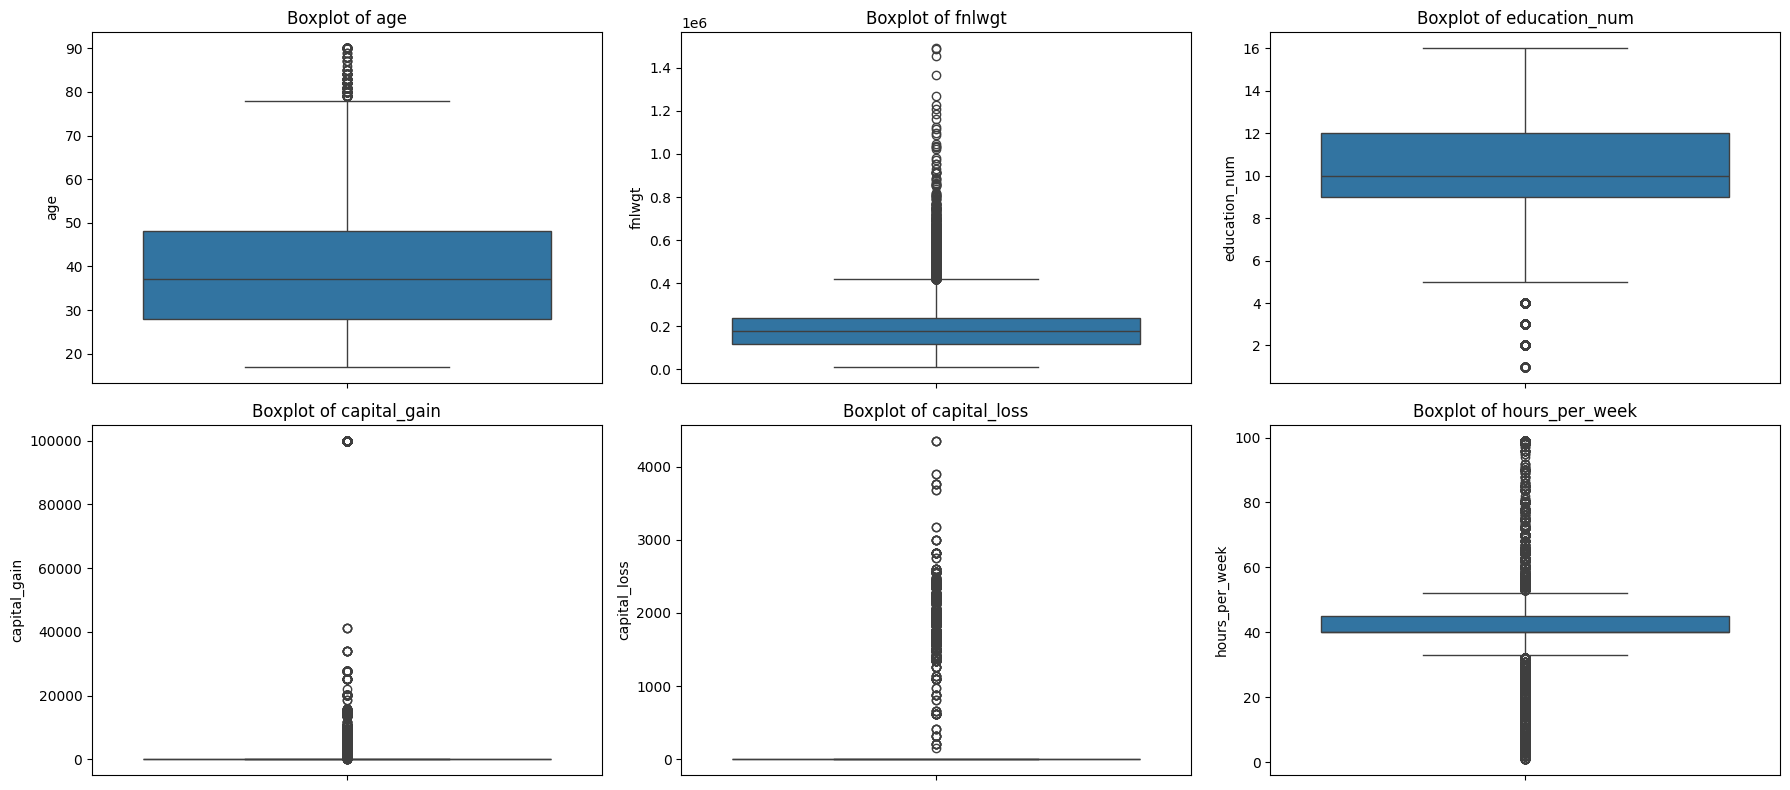

In [ ]:
columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
# Create subplots: 2 rows, 3 columns since there are 6 numerical columns
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through columns and plot
for i, col in enumerate(columns):
    sb.boxplot(data=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
#### Handle the outliers using masking
for i in ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5*iqr
    upper_whisker = q3 + 1.5*iqr
    median = data[i].median()
    data[i] = data[i].mask((data[i] < lower_whisker) | (data[i] > upper_whisker), median)

In [ ]:
#Since there is already education column, we can drop the 'education_num' column
data.drop('education_num', axis=1, inplace=True)

In [ ]:
data.head(10)

age         workclass    fnlwgt  education         marital_status  \
0   39         State-gov   77516.0  Bachelors          Never-married   
1   50  Self-emp-not-inc   83311.0  Bachelors     Married-civ-spouse   
2   38           Private  215646.0    HS-grad               Divorced   
3   53           Private  234721.0       11th     Married-civ-spouse   
4   28           Private  338409.0  Bachelors     Married-civ-spouse   
5   37           Private  284582.0    Masters     Married-civ-spouse   
6   49           Private  160187.0        9th  Married-spouse-absent   
7   52  Self-emp-not-inc  209642.0    HS-grad     Married-civ-spouse   
8   31           Private   45781.0    Masters          Never-married   
9   42           Private  159449.0  Bachelors     Married-civ-spouse   

          occupation   relationship   race     sex  capital_gain  \
0       Adm-clerical  Not-in-family  White    Male             0   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   
5    Exec-managerial           Wife  White  Female             0   
6      Other-service  Not-in-family  Black  Female             0   
7    Exec-managerial        Husband  White    Male             0   
8     Prof-specialty  Not-in-family  White  Female             0   
9    Exec-managerial        Husband  White    Male             0   

   capital_loss  hours_per_week native_country income  
0             0              40  United-States  <=50K  
1             0              40  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              40           Cuba  <=50K  
5             0              40  United-States  <=50K  
6             0              40        Jamaica  <=50K  
7             0              45  United-States   >50K  
8             0              50  United-States   >50K  
9             0              40  United-States   >50K

#### Histograms for numerical columns

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

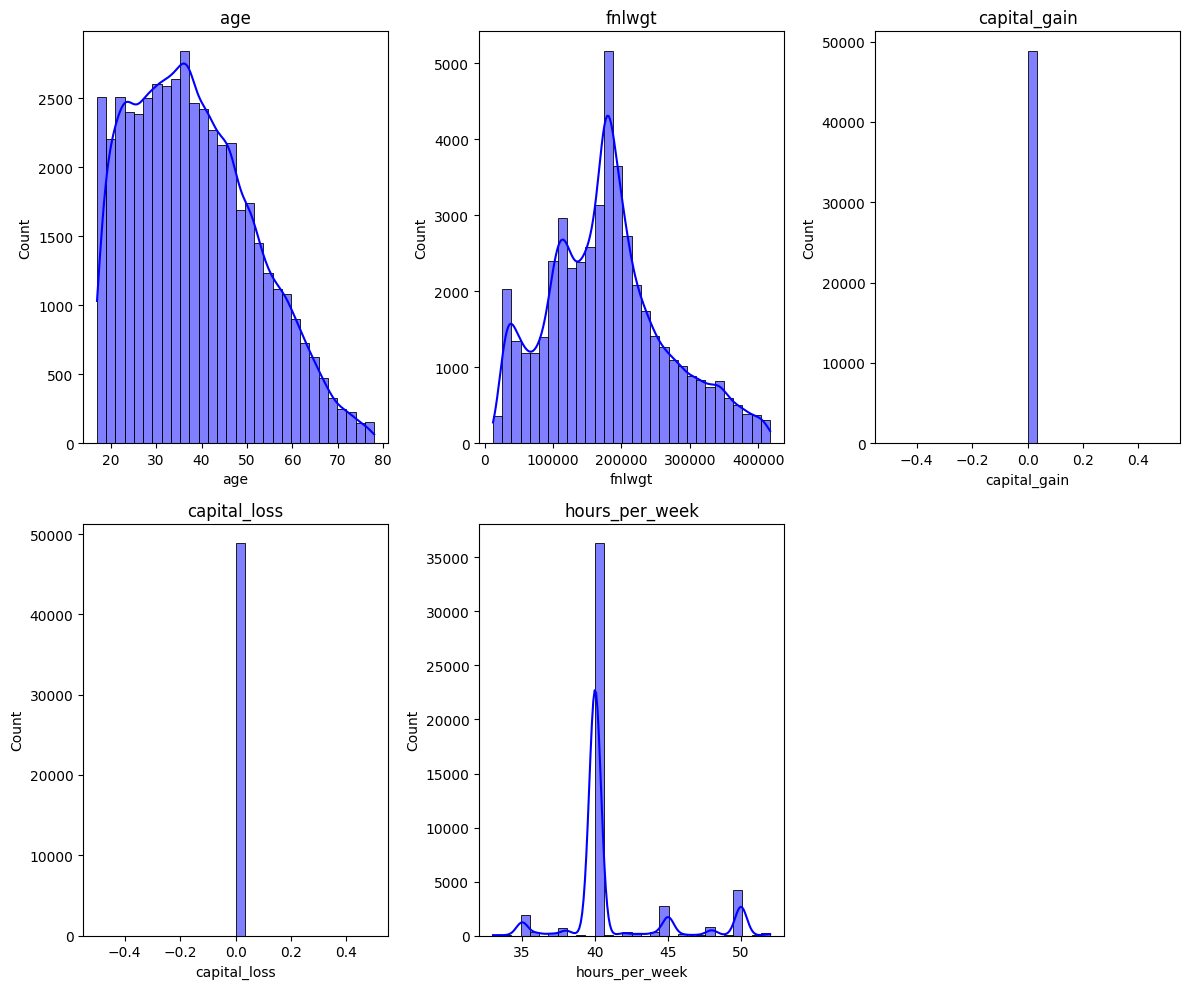

In [ ]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Adjust grid size based on the number of columns
    sb.histplot(data[col], bins=30, kde=True, color='blue') #kde creates a smooth curve in the histogram
    plt.title(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for i in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']:
    print(f'Number of unique values in {i} : {data[i].nunique()}')

Number of unique values in workclass : 8
Number of unique values in education : 16
Number of unique values in marital_status : 7
Number of unique values in occupation : 14
Number of unique values in relationship : 6
Number of unique values in race : 5
Number of unique values in sex : 2
Number of unique values in native_country : 41


In [ ]:
le = LabelEncoder()
for i in ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']:
    data[i] = le.fit_transform(data[i])

In [ ]:
#Perform One-hot encoding on sex column
oe = pd.get_dummies(data['sex'], drop_first=True)
data = pd.concat([data, oe], axis=1)
data.drop('sex', axis=1, inplace=True)

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital_status',
       'occupation', 'relationship', 'race', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income', 'Male'],
      dtype='object')

In [ ]:
#Rename the column to be more descriptive
data.rename(columns={'Male': 'gender_male'}, inplace=True)
data['gender_male'] = data['gender_male'].astype(int)

In [ ]:
data.head(10)

age  workclass    fnlwgt  education  marital_status  occupation  \
0   39          6   77516.0  Bachelors               4           0   
1   50          5   83311.0  Bachelors               2           3   
2   38          3  215646.0    HS-grad               0           5   
3   53          3  234721.0       11th               2           5   
4   28          3  338409.0  Bachelors               2           9   
5   37          3  284582.0    Masters               2           3   
6   49          3  160187.0        9th               3           7   
7   52          5  209642.0    HS-grad               2           3   
8   31          3   45781.0    Masters               4           9   
9   42          3  159449.0  Bachelors               2           3   

   relationship  race  capital_gain  capital_loss  hours_per_week  \
0             1     4             0             0              40   
1             0     4             0             0              40   
2             1     4             0             0              40   
3             0     2             0             0              40   
4             5     2             0             0              40   
5             5     4             0             0              40   
6             1     2             0             0              40   
7             0     4             0             0              45   
8             1     4             0             0              50   
9             0     4             0             0              40   

   native_country income  gender_male  
0              38  <=50K            1  
1              38  <=50K            1  
2              38  <=50K            1  
3              38  <=50K            1  
4               4  <=50K            0  
5              38  <=50K            0  
6              22  <=50K            0  
7              38   >50K            1  
8              38   >50K            0  
9              38   >50K            1

In [ ]:
#Perform OrdinalEncoding on education column
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [ ]:
ord_enc = OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
                   '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm',
                   'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']])

In [ ]:
data['education'] = ord_enc.fit_transform(data[['education']])

In [ ]:
#Perform Ordinal encoding on target feature
ord_income = OrdinalEncoder(categories=[['<=50K', '>50K']])
data['income'] = ord_income.fit_transform(data[['income']])

In [ ]:
data.head(10)

#### Since the target feature is float and it can never be a float in classification problem, the feature datatype has been converted from float to int.

In [ ]:
data['income'] = data['income'].astype(int)

In [ ]:
data.head(10)

age  workclass    fnlwgt  education  marital_status  occupation  \
0   39          6   77516.0       12.0               4           0   
1   50          5   83311.0       12.0               2           3   
2   38          3  215646.0        8.0               0           5   
3   53          3  234721.0        6.0               2           5   
4   28          3  338409.0       12.0               2           9   
5   37          3  284582.0       13.0               2           3   
6   49          3  160187.0        4.0               3           7   
7   52          5  209642.0        8.0               2           3   
8   31          3   45781.0       13.0               4           9   
9   42          3  159449.0       12.0               2           3   

   relationship  race  capital_gain  capital_loss  hours_per_week  \
0             1     4             0             0              40   
1             0     4             0             0              40   
2             1     4             0             0              40   
3             0     2             0             0              40   
4             5     2             0             0              40   
5             5     4             0             0              40   
6             1     2             0             0              40   
7             0     4             0             0              45   
8             1     4             0             0              50   
9             0     4             0             0              40   

   native_country  income  gender_male  
0              38       0            1  
1              38       0            1  
2              38       0            1  
3              38       0            1  
4               4       0            0  
5              38       0            0  
6              22       0            0  
7              38       1            1  
8              38       1            0  
9              38       1            1

In [ ]:
#Check the unique values in capital_gain and capital_loss columns
for i in ['capital_gain', 'capital_loss']:
    print(f'Unique values in {i} : {data[i].unique()}')

Unique values in capital_gain : [0]
Unique values in capital_loss : [0]


In [ ]:
#Since it is the same value across all the rows and doesn't provide any significant information to the model, the columns have been dropped
data.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True)

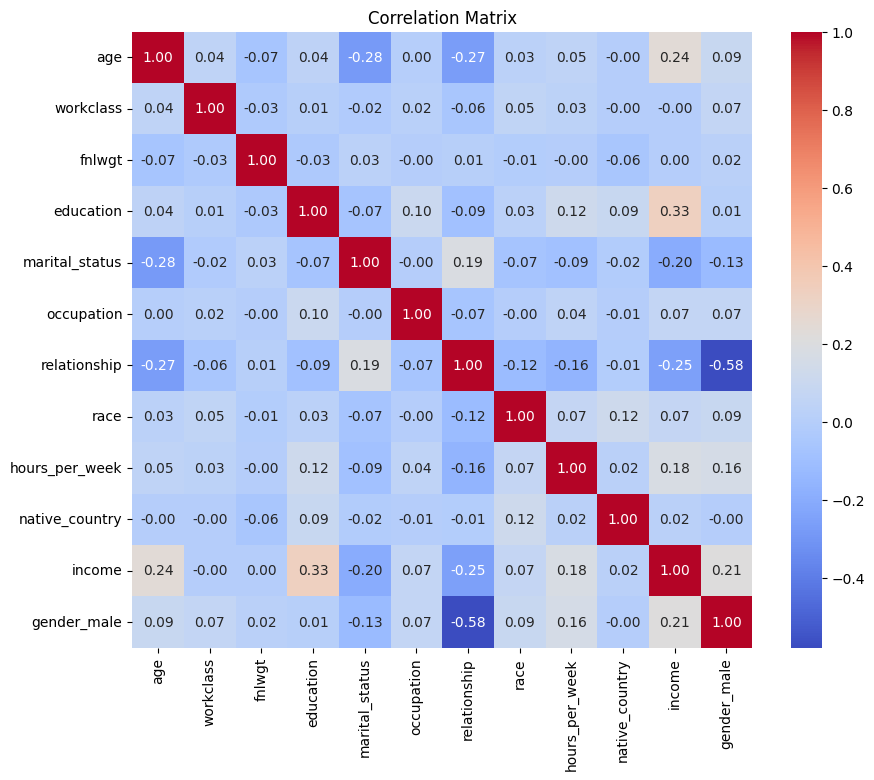

In [ ]:
#Plot the correlation matrix
corr = data.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(corr, annot=True, fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Observation:
With respect to target feature (income), education has the highest correlation with a score of 0.33
Age has a correlation coefficient of 0.24 with income, followed by gender with a correlation coefficient of 0.21.

#### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('income', axis=1)
Y = data['income']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Standard Scaler has been used since the outliers has already been handled.
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train.head(10)

age  workclass    fnlwgt  education  marital_status  occupation  \
0 -0.479380  -0.089510 -1.497264  -0.422853       -0.411075    1.770335   
1  0.490888   2.617479 -0.411696   1.522439       -0.411075    0.781711   
2 -0.255472  -1.894170  0.839356  -0.811912       -0.411075   -0.454069   
3  1.908973  -0.089510 -1.279543  -0.422853       -1.739000   -0.948381   
4  1.834337   1.715149 -1.754060  -0.422853        2.244776    1.276023   
5  1.461157  -0.089510  0.409909  -1.200970       -0.411075    0.287399   
6 -0.031564  -0.089510 -0.722794   1.133380        0.916851    0.287399   
7  0.416252  -0.089510 -0.221091   1.133380       -0.411075    1.276023   
8 -0.404744  -0.089510 -1.004805  -0.422853       -0.411075   -0.948381   
9  0.640161  -1.894170  0.727259  -0.033795        0.916851    1.028867   

   relationship      race  hours_per_week  native_country  gender_male  
0     -0.901788  0.391554       -0.323428        0.257469     0.704448  
1     -0.901788  0.391554       -0.323428        0.257469     0.704448  
2     -0.901788  0.391554       -0.323428        0.257469     0.704448  
3      1.592148  0.391554       -0.323428        0.257469     0.704448  
4     -0.278304  0.391554       -0.323428        0.257469     0.704448  
5     -0.901788  0.391554       -0.323428        0.257469     0.704448  
6      0.345180  0.391554        1.110576        0.257469    -1.419551  
7     -0.901788  0.391554       -0.323428        0.257469     0.704448  
8     -0.901788  0.391554        1.110576        0.257469     0.704448  
9     -0.278304 -1.979308       -0.323428        0.257469     0.704448

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_lr_pred = lr.predict(X_test)

In [ ]:
print(f'Accuracy of Logistic Regression: {lr.score(X_test, Y_test): .2f}')

Accuracy of Logistic Regression:  0.80


In [ ]:
conf_lr = confusion_matrix(Y_test, Y_lr_pred)
conf_lr

array([[6917,  497],
       [1442,  913]])

In [ ]:
target_names = ['<=50K', '>50K']
print(classification_report(Y_test, Y_lr_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.83      0.93      0.88      7414
        >50K       0.65      0.39      0.48      2355

    accuracy                           0.80      9769
   macro avg       0.74      0.66      0.68      9769
weighted avg       0.78      0.80      0.78      9769



#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
#Test different values of k to perform KNN
error_rates = []
k_values = range(1, 31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(Y_test, Y_pred)
    error_rates.append(error)

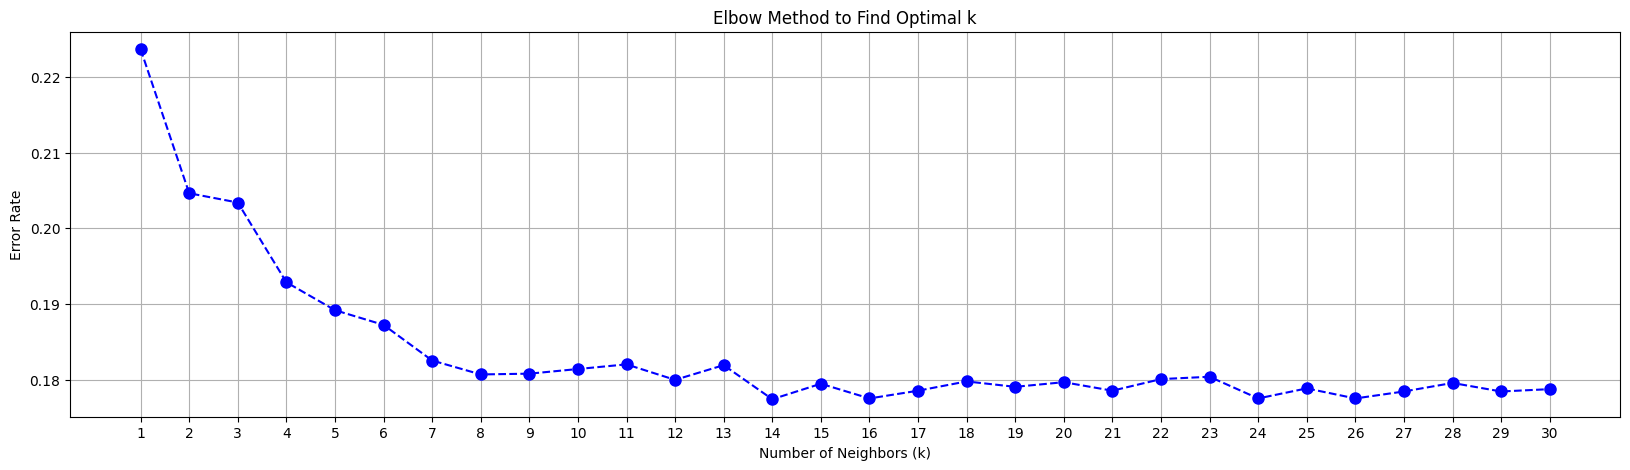

In [ ]:
#Plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 31))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [ ]:
knn_14 = KNeighborsClassifier(n_neighbors=14)
knn_16 = KNeighborsClassifier(n_neighbors=16)
knn_24 = KNeighborsClassifier(n_neighbors=24)
knn_26 = KNeighborsClassifier(n_neighbors=26)

score_k_14 = cross_val_score(knn_14, X_train, Y_train, cv=5)
score_k_16 = cross_val_score(knn_16, X_train, Y_train, cv=5)
score_k_24 = cross_val_score(knn_24, X_train, Y_train, cv=5)
score_k_26 = cross_val_score(knn_26, X_train, Y_train, cv=5)
avg_score_k_14 = mean(score_k_14)
avg_score_k_16 = mean(score_k_16)
avg_score_k_24 = mean(score_k_24)
avg_score_k_26 = mean(score_k_26)

print(f"Average score for 14 neighbors: {avg_score_k_14}")
print(f"Average score for 16 neighbors: {avg_score_k_16}")
print(f"Average score for 24 neighbors: {avg_score_k_24}")
print(f"Average score for 26 neighbors: {avg_score_k_26}")

Average score for 14 neighbors: 0.8238169068723705
Average score for 16 neighbors: 0.8243287168837992
Average score for 24 neighbors: 0.8251221416159883
Average score for 26 neighbors: 0.8253524810120654


In [ ]:
knn_26.fit(X_train, Y_train)
Y_knn_pred = knn_26.predict(X_test)

In [ ]:
print(f'Accuracy of KNN: {knn_26.score(X_test, Y_test): .2f}')

Accuracy of KNN:  0.82


In [ ]:
print(classification_report(Y_test, Y_knn_pred, target_names=target_names))


              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      7414
        >50K       0.67      0.51      0.58      2355

    accuracy                           0.82      9769
   macro avg       0.76      0.72      0.73      9769
weighted avg       0.81      0.82      0.81      9769



In [ ]:
conf_knn = confusion_matrix(Y_test, Y_knn_pred)
conf_knn

array([[6834,  580],
       [1154, 1201]])

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clr = DecisionTreeClassifier()
dt_clr.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_dt_pred = dt_clr.predict(X_test)
print(f'Accuracy of Decision Tree: {dt_clr.score(X_test, Y_test): .2f}')

Accuracy of Decision Tree:  0.77


In [ ]:
conf_dt = confusion_matrix(Y_test, Y_dt_pred)
conf_dt

array([[6266, 1148],
       [1128, 1227]])

In [ ]:
print(classification_report(Y_test, Y_dt_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.85      0.85      0.85      7414
        >50K       0.52      0.52      0.52      2355

    accuracy                           0.77      9769
   macro avg       0.68      0.68      0.68      9769
weighted avg       0.77      0.77      0.77      9769



dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0885597 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0885597 to fit



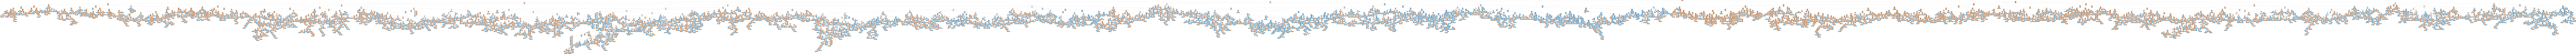

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dt_clr, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['less than 50K','greater than 50K'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Adult_Income.png')
Image(graph.create_png())

#### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(probability=True)
svc.fit(X_train, Y_train)

SVC(probability=True)

In [ ]:
Y_svc_pred = svc.predict(X_test)

In [ ]:
print(f'Accuracy of SVM: {svc.score(X_test, Y_test): .2f}')

Accuracy of SVM:  0.82


In [ ]:
print(classification_report(Y_test, Y_svc_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7414
        >50K       0.70      0.45      0.55      2355

    accuracy                           0.82      9769
   macro avg       0.77      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [ ]:
conf_svc = confusion_matrix(Y_test, Y_svc_pred)
conf_svc

array([[6966,  448],
       [1288, 1067]])

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_rf_pred = rf.predict(X_test)

In [ ]:
print(f'Accuracy of Random Forest: {rf.score(X_test, Y_test): .2f}')

Accuracy of Random Forest:  0.83


In [ ]:
print(classification_report(Y_test, Y_rf_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      7414
        >50K       0.66      0.56      0.61      2355

    accuracy                           0.83      9769
   macro avg       0.76      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769



In [ ]:
conf_rf = confusion_matrix(Y_test, Y_rf_pred)
conf_rf

array([[6747,  667],
       [1040, 1315]])

#### XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xg_train = xgb.DMatrix(X_train, Y_train)
xg_test = xgb.DMatrix(X_test, Y_test)

In [ ]:
xgb_clf = xgb.XGBClassifier(eval_metric='auc') #auc is used for classification
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
Y_xgb_pred = xgb_clf.predict(X_test)

In [ ]:
print(f'Accuracy of XGBoost: {xgb_clf.score(X_test, Y_test): .2f}')

Accuracy of XGBoost:  0.84


In [ ]:
print(classification_report(Y_test, Y_xgb_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      7414
        >50K       0.69      0.58      0.63      2355

    accuracy                           0.84      9769
   macro avg       0.78      0.75      0.76      9769
weighted avg       0.83      0.84      0.83      9769



In [ ]:
print(confusion_matrix(Y_test, Y_xgb_pred))


[[6810  604]
 [ 995 1360]]


#### AUC-ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc

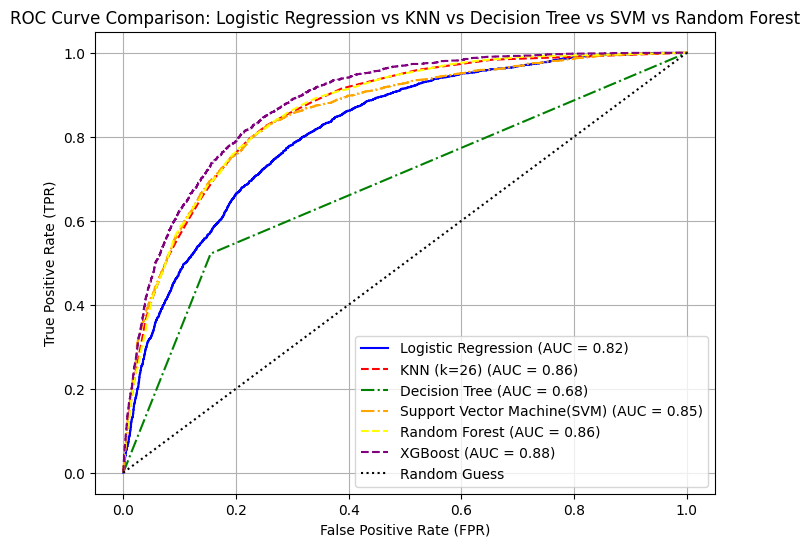

In [ ]:
Y_lr_probs = lr.predict_proba(X_test)[:, 1]
Y_knn_26_probs = knn_26.predict_proba(X_test)[:, 1]
Y_dt_probs = dt_clr.predict_proba(X_test)[:, 1]
Y_svm_probs = svc.predict_proba(X_test)[:, 1]
Y_rf_probs = rf.predict_proba(X_test)[:, 1]
Y_xgb_pred_probs = xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_knn_26_probs)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, Y_xgb_pred_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=26) (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='yellow', linestyle='dashed', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', linestyle='dashed', label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison for all the classification models")
plt.legend()
plt.grid(True)
plt.show()

#### Handling class imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
Y.value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X, Y = smote.fit_resample(X, Y)

In [ ]:
Y.value_counts()

income
0    37155
1    37155
Name: count, dtype: int64

In [ ]:
X.head(10)

age  workclass    fnlwgt  education  marital_status  occupation  \
0   39          6   77516.0       12.0               4           0   
1   50          5   83311.0       12.0               2           3   
2   38          3  215646.0        8.0               0           5   
3   53          3  234721.0        6.0               2           5   
4   28          3  338409.0       12.0               2           9   
5   37          3  284582.0       13.0               2           3   
6   49          3  160187.0        4.0               3           7   
7   52          5  209642.0        8.0               2           3   
8   31          3   45781.0       13.0               4           9   
9   42          3  159449.0       12.0               2           3   

   relationship  race  hours_per_week  native_country  gender_male  
0             1     4              40              38            1  
1             0     4              40              38            1  
2             1     4              40              38            1  
3             0     2              40              38            1  
4             5     2              40               4            0  
5             5     4              40              38            0  
6             1     2              40              22            0  
7             0     4              45              38            1  
8             1     4              50              38            0  
9             0     4              40              38            1

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train.head(10)

age  workclass    fnlwgt  education  marital_status  occupation  \
0 -1.326521  -0.003521  1.278959   0.560713        1.222697   -1.536687   
1  0.556414   2.738890  0.091077   0.560713       -0.294220    1.621501   
2  0.965747  -0.003521  0.441793  -0.401196       -0.294220    0.568772   
3 -1.735855  -0.003521 -1.252586  -0.243370        1.222697    0.305590   
4 -0.753454  -0.003521 -0.418864   0.158672       -0.294220    0.831954   
5 -1.817722  -0.003521  2.423147  -1.851537        1.222697    1.358319   
6  0.883881  -0.003521 -0.644772   0.473681       -0.294220    1.095137   
7  0.147080  -0.003521  0.512999   1.364797       -0.294220   -1.536687   
8  1.375081   0.910616 -1.637212  -0.986889        0.464238    0.042407   
9 -1.244655  -1.831796 -1.566049   0.962755       -0.294220    0.831954   

   relationship      race  hours_per_week  native_country  gender_male  
0      1.225918 -3.303196       -0.408024       -1.335657    -1.508374  
1     -0.732020  0.393939        1.916398        0.260665     0.662966  
2     -0.732020  0.393939       -0.408024       -2.931979     0.662966  
3     -0.079374  0.393939       -0.408024        0.260665     0.662966  
4      2.531210  0.393939       -0.408024        0.260665    -1.508374  
5      1.225918  0.393939       -0.408024        0.260665     0.662966  
6      0.573272  0.393939       -0.408024        0.260665    -1.508374  
7     -0.732020  0.393939       -0.408024        0.260665     0.662966  
8     -0.079374  0.393939        0.173081        0.260665    -1.508374  
9     -0.732020  0.393939       -0.408024        0.260665     0.662966

#### Logistic Regression

In [ ]:
lr_smote = LogisticRegression()
lr_smote.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_lr_smote_pred = lr_smote.predict(X_test)

In [ ]:
print(f'Accuracy of Logistic Regression: {lr_smote.score(X_test, Y_test): .2f}')

Accuracy of Logistic Regression:  0.76


In [ ]:
print(classification_report(Y_test, Y_lr_smote_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.79      0.72      0.75      7494
        >50K       0.74      0.80      0.77      7368

    accuracy                           0.76     14862
   macro avg       0.76      0.76      0.76     14862
weighted avg       0.76      0.76      0.76     14862



In [ ]:
print(confusion_matrix(Y_test, Y_lr_smote_pred))

[[5411 2083]
 [1463 5905]]


### KNN

In [ ]:
error_rates = []
k_values = range(1, 31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)  # Train the model
    Y_pred = knn.predict(X_test)  # Predict on test set
    error = 1 - accuracy_score(Y_test, Y_pred)  # Calculate error rate
    error_rates.append(error)

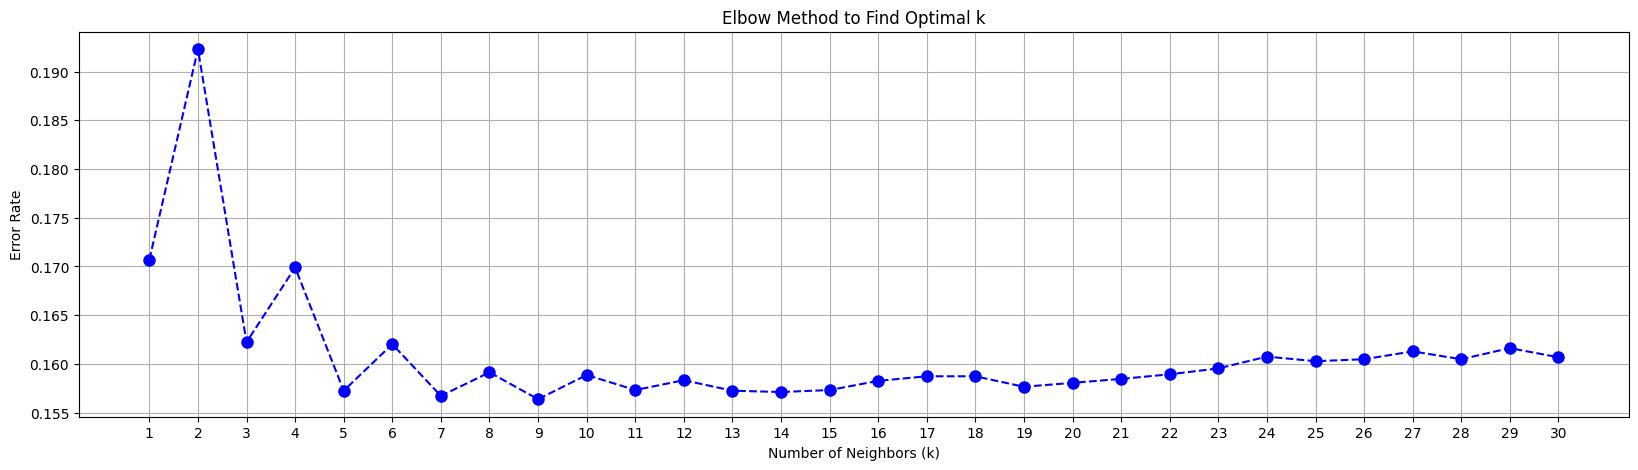

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 31))
plt.grid(True)
plt.show()

In [ ]:
knn_7 = cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train, Y_train, cv=5)
knn_9 = cross_val_score(KNeighborsClassifier(n_neighbors=9), X_train, Y_train, cv=5)

avg_score_k_7 = mean(knn_7)
avg_score_k_9 = mean(knn_9)

print(f"Average score for 7 neighbors: {avg_score_k_7}")
print(f"Average score for 9 neighbors: {avg_score_k_9}")

Average score for 7 neighbors: 0.8349481908664397
Average score for 9 neighbors: 0.8358060517878404


In [ ]:
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train, Y_train)
Y_knn_pred_smote = knn_9.predict(X_test)

In [ ]:
print(f'Accuracy of KNN: {knn_9.score(X_test, Y_test): .2f}')

Accuracy of KNN:  0.84


In [ ]:
print(classification_report(Y_test, Y_knn_pred_smote, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.86      0.83      0.84      7494
        >50K       0.83      0.86      0.85      7368

    accuracy                           0.84     14862
   macro avg       0.84      0.84      0.84     14862
weighted avg       0.84      0.84      0.84     14862



### Decision Tree

In [ ]:
dt_clr_smote = DecisionTreeClassifier()
dt_clr_smote.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_dt_smote_pred = dt_clr_smote.predict(X_test)

In [ ]:
print(f'Accuracy of Decision Tree: {dt_clr_smote.score(X_test, Y_test): .2f}')

Accuracy of Decision Tree:  0.84


In [ ]:
print(classification_report(Y_test, Y_dt_smote_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.85      0.84      0.84      7494
        >50K       0.84      0.85      0.84      7368

    accuracy                           0.84     14862
   macro avg       0.84      0.84      0.84     14862
weighted avg       0.84      0.84      0.84     14862



In [ ]:
print(confusion_matrix(Y_test, Y_dt_smote_pred))

[[6277 1217]
 [1113 6255]]


#### SVM

In [ ]:
svc_smote = SVC(probability=True)
svc_smote.fit(X_train, Y_train)

SVC(probability=True)

In [ ]:
Y_svc_smote_pred = svc_smote.predict(X_test)

In [ ]:
print(f'Accuracy of SVM: {svc_smote.score(X_test, Y_test): .2f}')

Accuracy of SVM:  0.84


In [ ]:
print(classification_report(Y_test, Y_svc_smote_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.88      0.79      0.83      7494
        >50K       0.81      0.89      0.85      7368

    accuracy                           0.84     14862
   macro avg       0.84      0.84      0.84     14862
weighted avg       0.84      0.84      0.84     14862



In [ ]:
print(confusion_matrix(Y_test, Y_svc_smote_pred))

[[5952 1542]
 [ 839 6529]]


#### Random Forest

In [ ]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_rf_smote_pred = rf_smote.predict(X_test)

In [ ]:
print(f'Accuracy of Random Forest: {rf_smote.score(X_test, Y_test): .2f}')

Accuracy of Random Forest:  0.88


In [ ]:
print(classification_report(Y_test, Y_rf_smote_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      7494
        >50K       0.88      0.87      0.88      7368

    accuracy                           0.88     14862
   macro avg       0.88      0.88      0.88     14862
weighted avg       0.88      0.88      0.88     14862



In [ ]:
print(confusion_matrix(Y_test, Y_rf_smote_pred))

[[6594  900]
 [ 925 6443]]


#### XGBoost

In [ ]:
xg_smote_train = xgb.DMatrix(X_train, Y_train)
xg_smote_test = xgb.DMatrix(X_test, Y_test)

In [ ]:
xgb_clf_smote = xgb.XGBClassifier(eval_metric='auc')
xgb_clf_smote.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
Y_xgb_smote_pred = xgb_clf_smote.predict(X_test)

In [ ]:
print(f'Accuracy of XGBoost: {xgb_clf_smote.score(X_test, Y_test): .2f}')

Accuracy of XGBoost:  0.88


In [ ]:
print(classification_report(Y_test, Y_xgb_smote_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.89      7494
        >50K       0.89      0.88      0.88      7368

    accuracy                           0.88     14862
   macro avg       0.88      0.88      0.88     14862
weighted avg       0.88      0.88      0.88     14862



In [ ]:
print(confusion_matrix(Y_test, Y_xgb_smote_pred))

[[6690  804]
 [ 913 6455]]


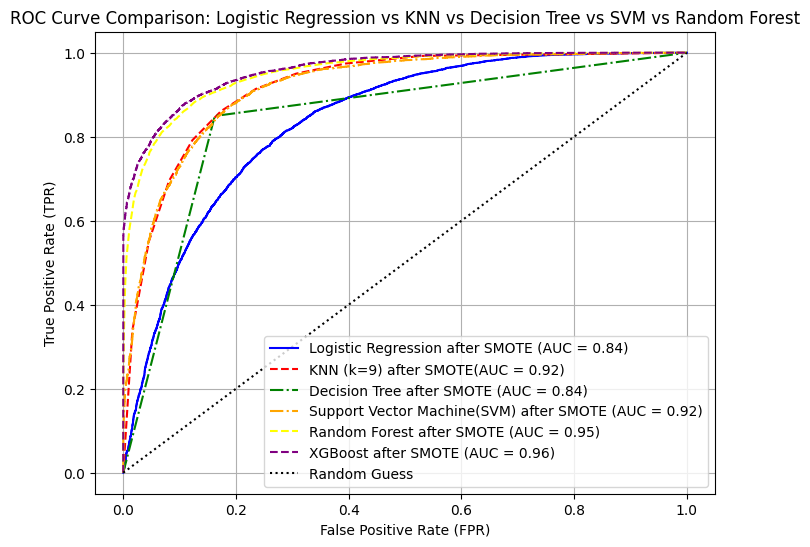

In [ ]:
Y_lr_smote_probs = lr_smote.predict_proba(X_test)[:, 1]
Y_knn_9_smote_probs = knn_9.predict_proba(X_test)[:, 1]
Y_dt_smote_probs = dt_clr_smote.predict_proba(X_test)[:, 1]
Y_svm_smote_probs = svc_smote.predict_proba(X_test)[:, 1]
Y_rf_smote_probs = rf_smote.predict_proba(X_test)[:, 1]
Y_xgb_smote_probs = xgb_clf_smote.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_lr_smote_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_knn_9_smote_probs)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_dt_smote_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_svm_smote_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_rf_smote_probs)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, Y_xgb_smote_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression after SMOTE (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=9) after SMOTE(AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree after SMOTE (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) after SMOTE (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='yellow', linestyle='dashed', label=f'Random Forest after SMOTE (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', linestyle='dashed', label=f'XGBoost after SMOTE (AUC = {auc_xgb:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison for all the classification models")
plt.legend()
plt.grid(True)
plt.show()